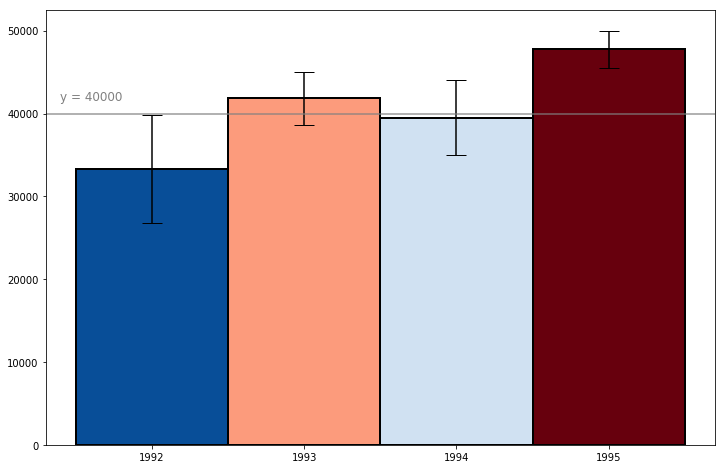

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def data_to_barplot():
    np.random.seed(12345)

    df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                       np.random.normal(43000,100000,3650), 
                       np.random.normal(43500,140000,3650), 
                       np.random.normal(48000,70000,3650)], 
                      index=[1992,1993,1994,1995])
    # getting mean, standard deviation, standard error:
    df['year_avg'] = df.mean(axis = 1)
    df['year_std'] = df.std(axis = 1)
    df['year_error'] = df['year_std'] / np.sqrt(3650)
    # removing unnecessary columns and calculating 95% conf interval
    columns_to_keep = ['year_avg', 'year_std', 'year_error']
    df = df[columns_to_keep]
    yerr = 1.96*df['year_error']
    # creating colors range, generating color value for each year:
    reds = cm.Reds
    blues = cm.Blues
    n = 100
    y = 40000
    df['diff'] = n*((y - df['year_avg']) / n)
    df['sign'] = df['diff'].abs()/df['diff']
    old_range = abs(df['diff']).min(), df['diff'].abs().max()
    new_range = 0.2,1
    df['shade'] = df['sign']*np.interp(df['diff'].abs(), old_range, new_range)
    shade = df['shade']
    colour = ['white' if x == 0 else reds(abs(x)) if x < 0 else blues(abs(x)) for x in shade]
    # ploting
    fig = plt.figure(figsize = (12,8))
    plt.bar(df.index, df['year_avg'],
            yerr = yerr,
            edgecolor = 'black', 
            width=1,
            linewidth='2', 
            capsize=10,
            color = colour)
    # reorganizing x axis and creating y line:
    plt.xticks(df.index)
    plt.axhline(y = y, color = 'grey', alpha = 0.8)
    plt.text(1991.6, 42000, 'y = 40000', fontsize=12, va='center', ha='center', backgroundcolor='w', color= 'grey')
    # saving and displaying figure
    fig.savefig('assignment3.png', format = 'png')
    plt.show()
    
data_to_barplot()